In [1]:
import numpy as np 
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

import pylab as pl
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)

params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pl.rcParams.update(params)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
path1 = 'data/driver'
path2 = 'data/alt'
# frequency = df.iloc[1].values
filenames = [join(path1,f) for f in listdir(path1) if isfile(join(path1, f))]
filenames

['data/driver/driver5.csv',
 'data/driver/driver6.csv',
 'data/driver/driver2.csv',
 'data/driver/driver1.csv',
 'data/driver/driver3.csv',
 'data/driver/driver4.csv']

In [3]:
def file_names(path):
    filenames = [join(path,f) for f in listdir(path) if isfile(join(path, f))]
    return filenames

In [4]:
def import_data(filename,quant=False):
    df = pd.read_csv(filename , header= None)
    df.columns = ['eda']
    frequency = df.iloc[1].values
#     df = df[10000:]
    df_init_time = datetime.datetime(2018, np.random.choice(range(3,5),1), 
                                     np.random.choice(range(1,30),1), 
                                     7, 0,0).strftime('%Y-%m-%d %H:%M:%S')
    time_series = pd.date_range(start=df_init_time, periods=len(df), 
                          freq=str(1/int(frequency))+'S')
    df = df.set_index(time_series, drop =True)
    df = df[3:]
    df= df.between_time('7:00', '9:00')
    df['std_eda'] = (df.eda - df.eda.mean()) / (df.eda.std())
    df['norm_eda'] = (df.eda - df.eda.min()) / (df.eda.max() - df.eda.min())
#     df = df.round(3)
    eda_mean = np.mean(df.norm_eda)
    max_scr = max(df.norm_eda)
    eda_quan = df.norm_eda.quantile(quant)
    count = sum(i > eda_quan for i in df.norm_eda)

    return df,count
    


In [5]:
def ttest(group1, group2):
    print('')
#      stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)
    print('     Test Results: ',stats.ttest_ind(group1,group2, axis=0, equal_var=False))

    return ''

In [6]:
def all_plot(df_list):
    fig, axs = plt.subplots(12,1, figsize=(18, 14))

#     fig.subplots_adjust(hspace = 1, wspace=.01)
    axs = axs.ravel()

    for i,df in enumerate(df_list):   
        yn = np.asarray(df.eda)
  
        axs[i].plot(df.index, yn,alpha = 0.8,color= 'turquoise')
#         axs[i].plot(df.index, yn,alpha = 0.7,color = 'lightsalmon')

#         axs[i].title('Total number of Phasic Response above 75 quantile are %s'% count_list[i])
        axs[i].legend(['Raw EDA'],loc="upper right")
#         axs[i].axhline(y = eda_quans[i], color = 'c', linestyle = '--',alpha = 0.8)
#     pl.legend('Raw_EDA')
    pl.savefig('all_eda.png', transparent=True)
    pl.show()

In [7]:
  def comp_plot(df_list,count_list):
    fig, axs = plt.subplots(6,2, figsize=(18, 14))

#     fig.subplots_adjust(hspace = 1, wspace=.01)
    axs = axs.ravel()

    for i,df in enumerate(df_list):   
#         print(counts[i])
        yn = np.asarray(df.std_eda)
        Fs = 4.
        [r, p, t, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1./Fs)


#         pl.rcParams['figure.figsize'] = (15,10)
        tm = pl.arange(1., len(yn)+1.) / Fs
        axs[i].plot(tm, yn,alpha = 0.6,color= 'mediumaquamarine')
        axs[i].plot(tm, r,alpha = 0.7,color = 'lightsalmon')

#         axs[i].title('Total number of Phasic Response above 75 quantile are %s'% count_list[i])
        axs[i].legend(['SkinConductance Z-score','Phasic Component'] ,loc="upper right")
#         axs[i].axhline(y = eda_quans[i], color = 'c', linestyle = '--',alpha = 0.8)
    pl.savefig('stacked.png', transparent=True)
    pl.show()

In [8]:
(df1_1,count1_1),(df1_2,count1_2),(df1_3,count1_3),(df1_4,count1_4),(df1_5,count1_5),(df1_6,count1_6) =  [import_data(filepath,0.95) 
                                                                                                             for filepath in file_names(path1)]
df_list1 = [df1_1, df1_2, df1_3, df1_4, df1_5, df1_6]

In [9]:
(df2_1,count2_1),(df2_2,count2_2),(df2_3,count2_3),(df2_4,count2_4),(df2_5,count2_5),(df2_6,count2_6) =  [import_data(filepath,0.95) 
                                                                                                          for filepath in file_names(path2)]
df_list2 = [df2_1, df2_2, df2_3, df2_4, df2_5, df2_6]
df_list = df_list1+df_list2

In [10]:
# ,(df1_6,count1_6) ,(df2_6,count2_6)
drive = [count1_1+1000,count1_2+1000,count1_3+1000,count1_4+500,count1_5+200,count1_6+300]
alt = [count2_1,count2_2,count2_3,count2_4,count2_5,count2_6]


In [11]:
counts = drive+alt
counts

[3134, 2439, 2438, 1939, 3079, 1740, 1361, 1439, 1434, 1440, 1195, 1432]

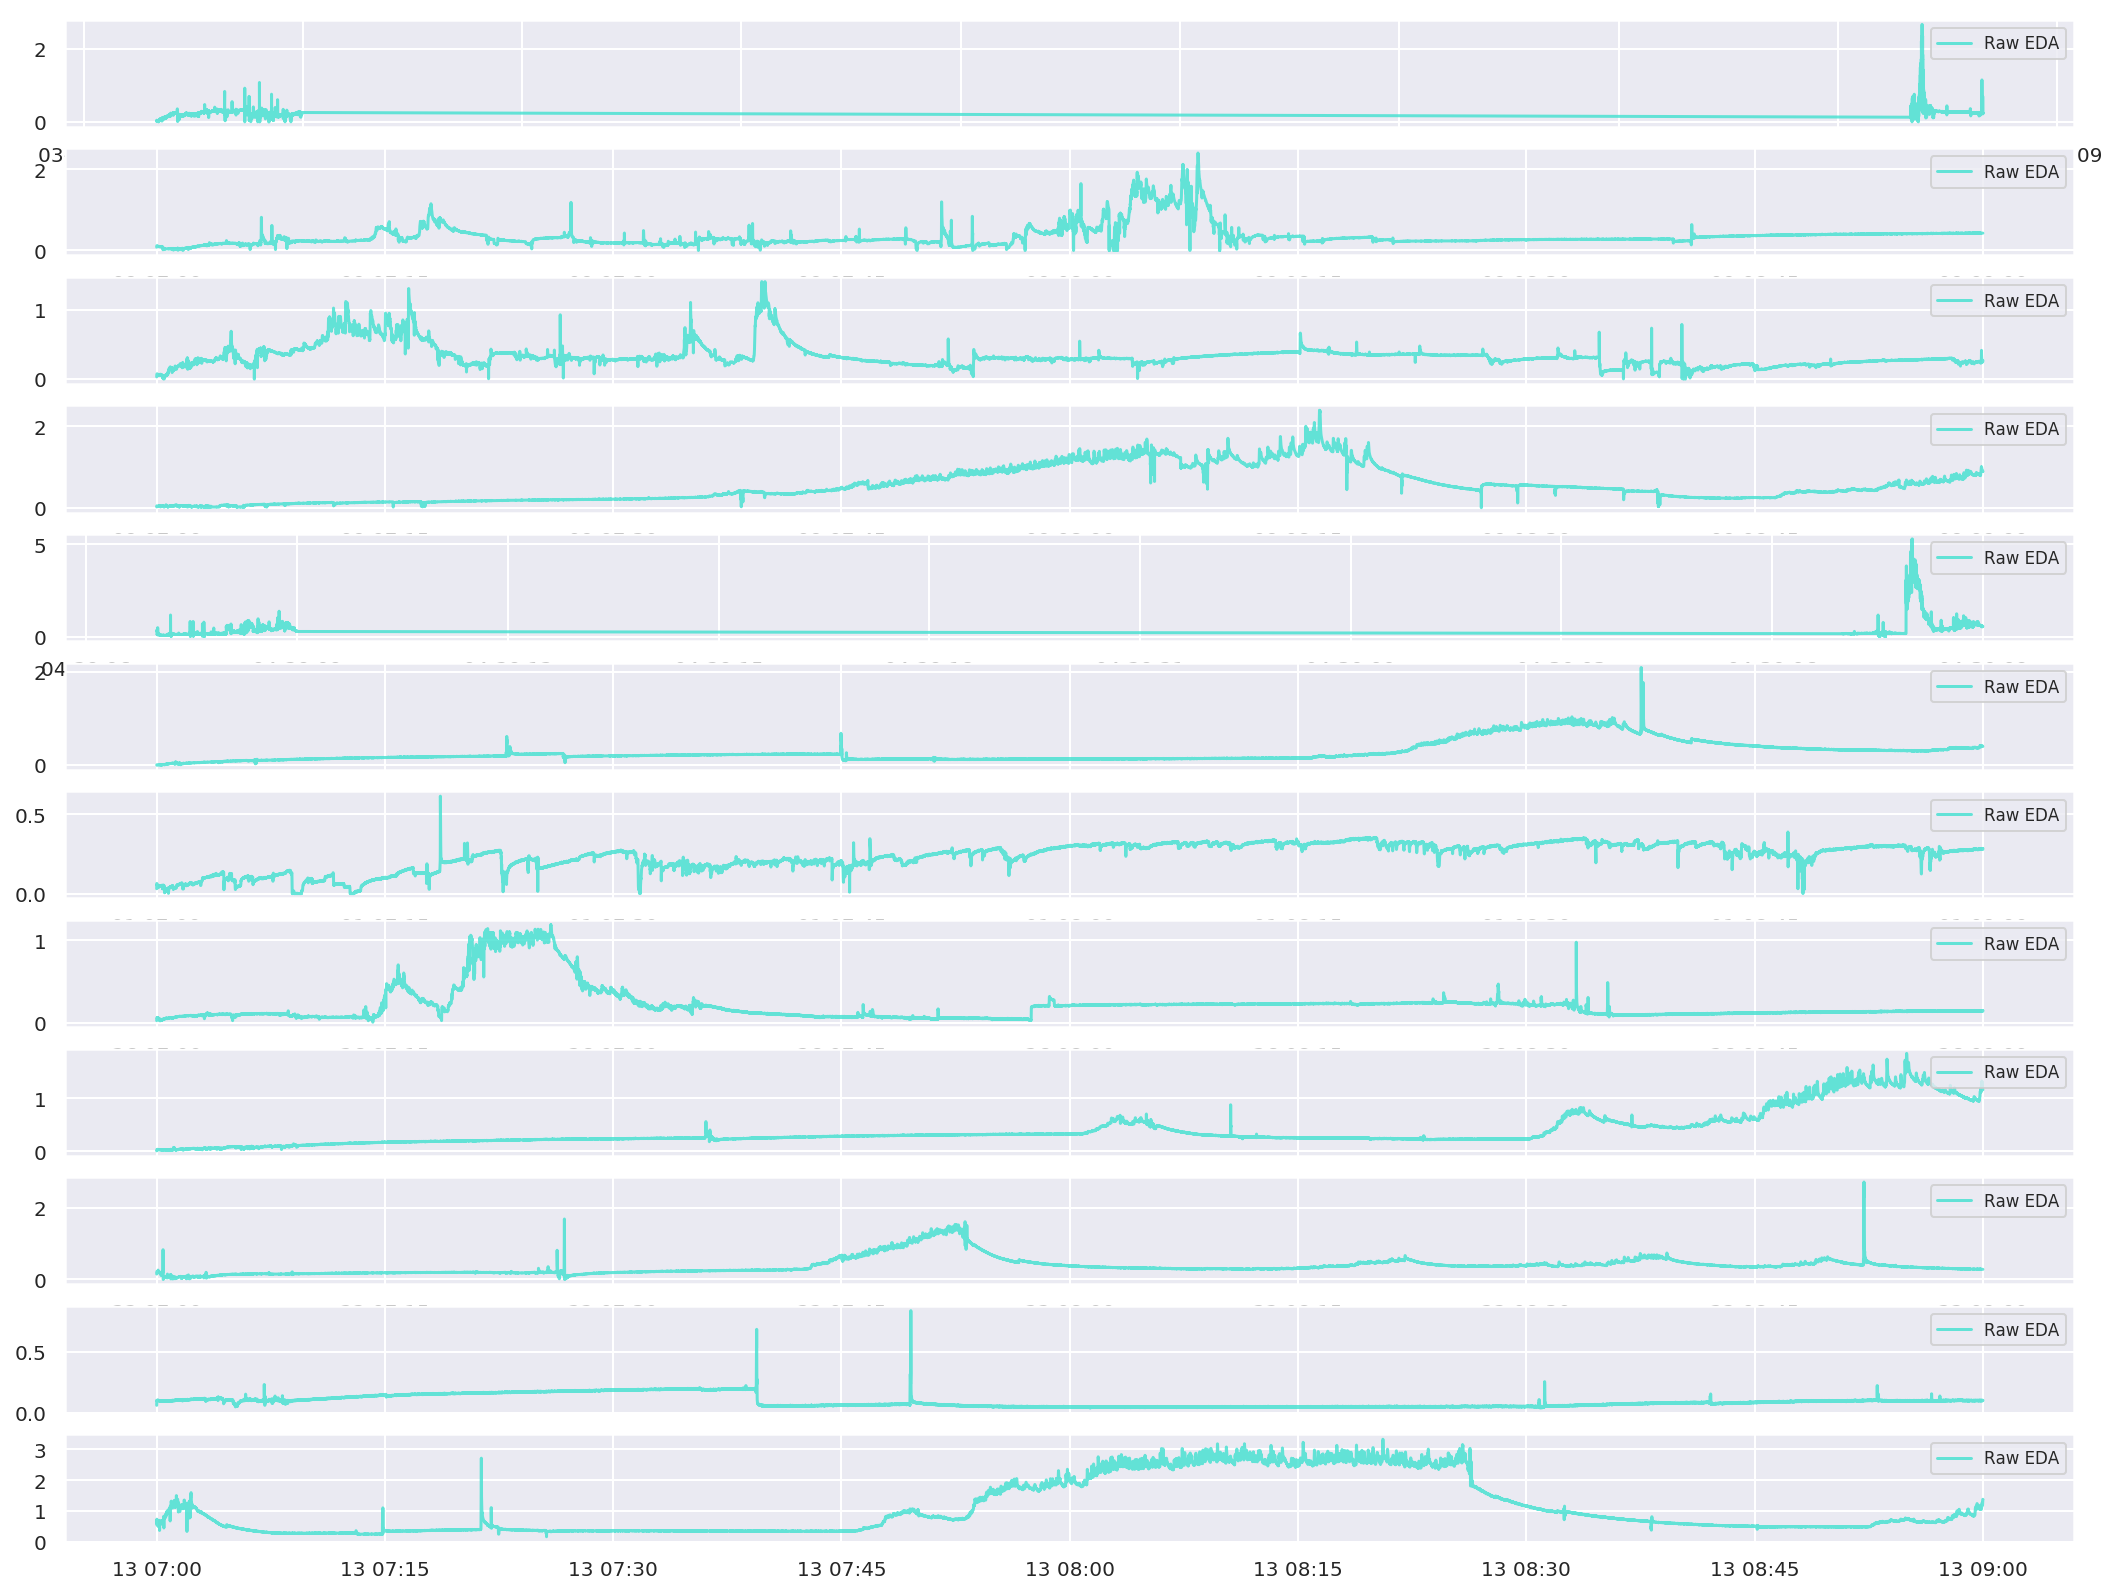

In [12]:
all_plot(df_list)

     pcost       dcost       gap    pres   dres
 0: -2.0798e+04 -2.0333e+04  5e+05  7e+02  7e-01
 1: -2.0946e+04 -1.1877e+05  1e+05  1e+02  1e-01
 2: -2.1061e+04 -6.4869e+04  5e+04  4e+01  4e-02
 3: -2.1105e+04 -3.7088e+04  2e+04  1e+01  1e-02
 4: -2.1120e+04 -2.9851e+04  9e+03  5e+00  5e-03
 5: -2.1102e+04 -2.4968e+04  4e+03  2e+00  2e-03
 6: -2.1080e+04 -2.3014e+04  2e+03  7e-01  7e-04
 7: -2.1117e+04 -2.1726e+04  6e+02  2e-01  2e-04
 8: -2.1217e+04 -2.1467e+04  2e+02  6e-02  6e-05
 9: -2.1282e+04 -2.1398e+04  1e+02  2e-02  2e-05
10: -2.1320e+04 -2.1381e+04  6e+01  6e-03  6e-06
11: -2.1348e+04 -2.1376e+04  3e+01  2e-03  2e-06
12: -2.1361e+04 -2.1374e+04  1e+01  6e-04  6e-07
13: -2.1367e+04 -2.1373e+04  6e+00  2e-04  2e-07
14: -2.1370e+04 -2.1373e+04  3e+00  6e-05  6e-08
15: -2.1371e+04 -2.1372e+04  1e+00  1e-05  1e-08
16: -2.1372e+04 -2.1372e+04  4e-01  2e-06  2e-09
17: -2.1372e+04 -2.1372e+04  1e-01  4e-07  4e-10
18: -2.1372e+04 -2.1372e+04  4e-02  9e-08  9e-11
19: -2.1372e+04 -2.13

     pcost       dcost       gap    pres   dres
 0: -1.4346e+04 -1.4288e+04  6e+04  2e+02  3e-01
 1: -1.4337e+04 -2.4642e+04  1e+04  5e+01  7e-02
 2: -1.4341e+04 -1.7653e+04  3e+03  1e+01  1e-02
 3: -1.4343e+04 -1.5416e+04  1e+03  3e+00  4e-03
 4: -1.4340e+04 -1.5234e+04  9e+02  2e+00  3e-03
 5: -1.4340e+04 -1.4718e+04  4e+02  8e-01  1e-03
 6: -1.4336e+04 -1.4562e+04  2e+02  4e-01  5e-04
 7: -1.4344e+04 -1.4429e+04  8e+01  1e-01  1e-04
 8: -1.4368e+04 -1.4391e+04  2e+01  2e-02  3e-05
 9: -1.4379e+04 -1.4387e+04  9e+00  6e-03  8e-06
10: -1.4383e+04 -1.4386e+04  4e+00  1e-03  2e-06
11: -1.4385e+04 -1.4386e+04  1e+00  3e-04  5e-07
12: -1.4386e+04 -1.4386e+04  5e-01  7e-05  1e-07
13: -1.4386e+04 -1.4386e+04  2e-01  2e-05  2e-08
14: -1.4386e+04 -1.4386e+04  5e-02  3e-06  4e-09
15: -1.4386e+04 -1.4386e+04  1e-02  5e-07  7e-10
16: -1.4386e+04 -1.4386e+04  4e-03  9e-08  1e-10
17: -1.4386e+04 -1.4386e+04  1e-03  2e-08  3e-11
18: -1.4386e+04 -1.4386e+04  3e-04  2e-09  2e-12
19: -1.4386e+04 -1.43

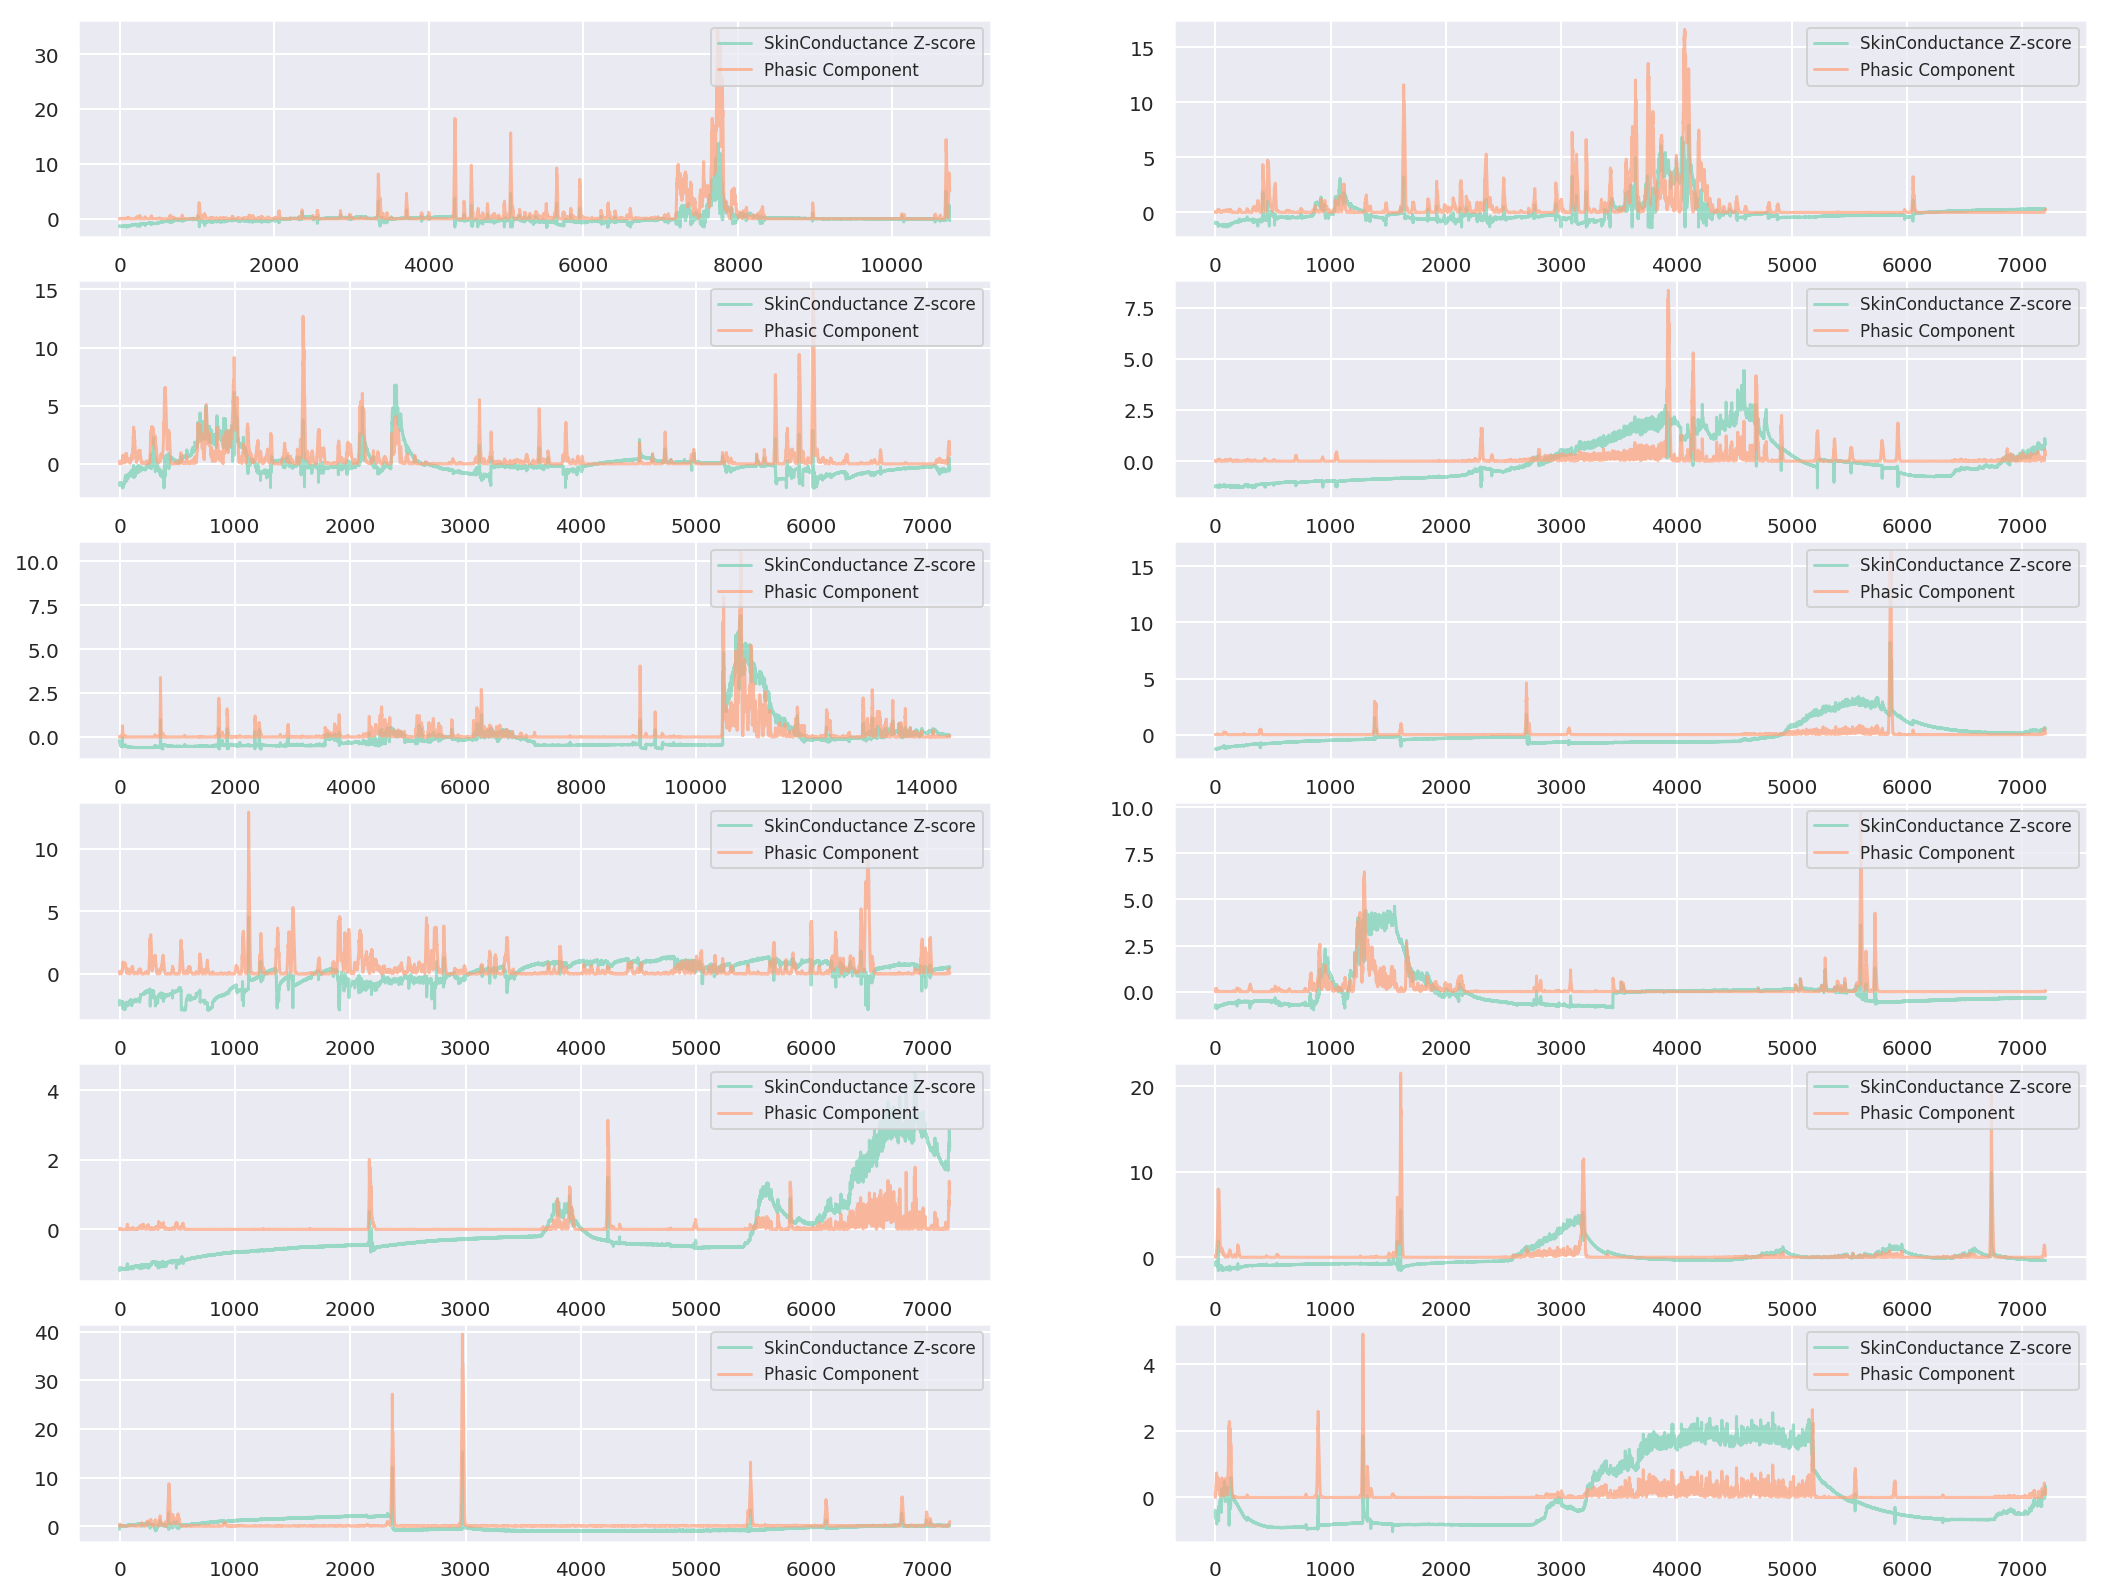

In [13]:
comp_plot(df_list,counts)

In [14]:
drive_alt = pd.DataFrame({'drive':drive,
                        'alt':alt})
drive_alt.head()

,drive,alt
0,3134,1361
1,2439,1439
2,2438,1434
3,1939,1440
4,3079,1195


In [15]:
ttest(drive,alt)


     Test Results:  Ttest_indResult(statistic=4.561626719490804, pvalue=0.005264841354395723)


''

Based on the p-value of this two-tail t-test, we can see that t-statistics > 0 (which implies that our null hypothesis is drivers' average phasic response duration is smaller or equal to the commuters in the alternative transit group) and p-value/2 = 0.00263 < 0.05. 

Therefore, we can reject our null hypothesis and conclude that the average drivers' phasic responses duration is indeed larger than the commuters in the alternative transit group during the morning commute time. 

In [16]:
0.00526/2

0.00263